<div>
    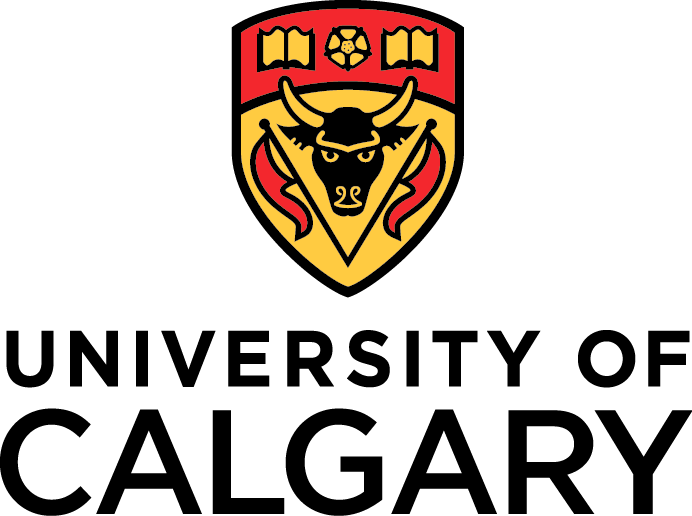
</div>

# ENEL 545 Final Project 

# Deep learning using convolutional neural networks in Keras and Tensorflow

## Student: Pablo Adames
## ID: 00284546
## Due: June 21, 2020 (11:59 pm)

The original data came from [Laurence Moroney](http://www.laurencemoroney.com/horses-or-humans-dataset/). There were two links on the authors page: one to a train forlder with humans and horses folders, a second test folder with subfolders for humans and horses.

An exploration of the files showed that the images of humnas and horses in the train folder had color backgrounds while the ones in the test folder had only white (empty) backgrounds. For this reason all files were shuffled and ramdomly sampled without replacement into three folders: train, validation, and test, each one having two subfolders: one for humans and another for horses.

The model was trained using the Keras API pyhton implementation and Tensorflow as the backend. The model and the weights were saved separately. This script builds the same model using python as the modelling language and the Keras API. Then it loads the weights from the trained model and runs it on a provided test sample with labels.

As a second alternative, the model can also be passed a 300 by 300 pixel color image of a human or horse to check its spot accuracy.


## Imports



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

from tensorflow.keras import models
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import optimizers

import joblib
from joblib import parallel_backend
from time import process_time

n_jobs = getattr(joblib, "effective_n_jobs")()
print("Number of cores available for the parallel backend: {}".format(n_jobs))
print("Scikit-learn version: {}".format(sk.__version__))
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + tf.keras.__version__)

Number of cores available for the parallel backend: 12
Scikit-learn version: 0.22.1
TensorFlow version: 2.2.0
Keras version: 2.3.0-tf


## Build the model to evaluate
The same one built from the R Jupyter notebook and the one for which the weights were saved.

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 33, 33, 128)      

## Load the saved weights
This is the Chollet's model.

In [34]:
model.load_weights("model-weights/horses_vs_humans_wgts_2.h5")

In [46]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [48]:
test_dir = "data/test/"
test_generator = test_datagen.flow_from_directory(        
    test_dir,        
    target_size=(300, 300),
    batch_size=20,        
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 194 images belonging to 2 classes.
50/50 [==============================] - 10s 203ms/step - loss: 0.0451 - acc: 0.9794
test acc: 0.9793814420700073


## Create the model for the Google Colab model

In [40]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [41]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 296, 296, 32)      4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 35, 35, 64)       

## Load the saved weights

In [42]:
model2.load_weights("model-weights/horses_vs_humans_wgts_Moroney2.h5")

In [49]:
test_loss, test_acc = model2.evaluate(test_generator, steps=50)
print('test acc model2:', test_acc)

50/50 [==============================] - 11s 225ms/step - loss: 0.0365 - acc: 0.9856
test acc model2: 0.985567033290863
